In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [4]:
url = "https://raw.githubusercontent.com/plotly/datasets/master/iris.csv"
data = pd.read_csv(url)
data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.tail()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
data.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
data.shape

(150, 5)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Name         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
data.isnull().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Name           0
dtype: int64

In [21]:
X = data.drop(['Name'], axis = 1)
Y = data.drop(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'], axis = 1)
print(X)
print(Y)

     SepalLength  SepalWidth  PetalLength  PetalWidth
0            5.1         3.5          1.4         0.2
1            4.9         3.0          1.4         0.2
2            4.7         3.2          1.3         0.2
3            4.6         3.1          1.5         0.2
4            5.0         3.6          1.4         0.2
..           ...         ...          ...         ...
145          6.7         3.0          5.2         2.3
146          6.3         2.5          5.0         1.9
147          6.5         3.0          5.2         2.0
148          6.2         3.4          5.4         2.3
149          5.9         3.0          5.1         1.8

[150 rows x 4 columns]
               Name
0       Iris-setosa
1       Iris-setosa
2       Iris-setosa
3       Iris-setosa
4       Iris-setosa
..              ...
145  Iris-virginica
146  Iris-virginica
147  Iris-virginica
148  Iris-virginica
149  Iris-virginica

[150 rows x 1 columns]


In [22]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.2, shuffle = True)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(120, 4)
(30, 4)
(120, 1)
(30, 1)


In [23]:
from sklearn.naive_bayes import GaussianNB 
model = GaussianNB()
model.fit(X_train, Y_train.values.ravel())

GaussianNB()

In [24]:
Y_pred = model.predict(X_test)
model.score(X_test, Y_test)

0.9666666666666667

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
print(accuracy_score(Y_test, Y_pred))

0.9666666666666667


In [26]:
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
print("Confusion Matrix: ")
print(cm)


Confusion Matrix: 
[[11  0  0]
 [ 0  9  1]
 [ 0  0  9]]


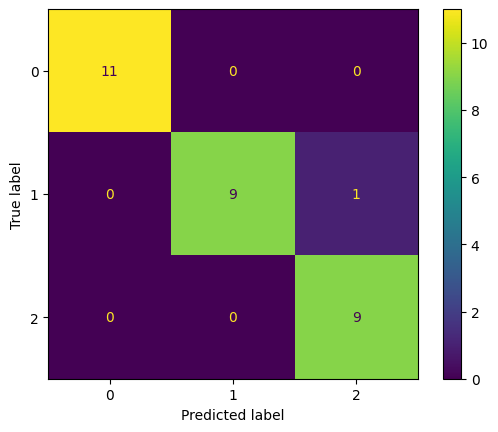

In [27]:
disp.plot()

In [29]:
from sklearn.metrics import confusion_matrix

def get_confusion_matrix_values(Y_true, Y_pred):
    cm = confusion_matrix(Y_true, Y_pred)
    return cm[0][0], cm[0][1], cm[1][1]

TP, FP, FN = get_confusion_matrix_values(Y_test, Y_pred)
TN = len(Y_test) - (TP + FP + FN)  # Calculating TN using the total number of samples
print("TP:", TP)
print("FP:", FP)
print("FN:", FN)                        
print("TN:", TN)

TP: 11
FP: 0
FN: 9
TN: 10


In [30]:
print("The accuracy is : ", (TP + FN) / (TP + TN + FP + FN))
print("The precision is: ", TP / (TP + FP))
print("The recall is: ", TP / (TP + FN))

The accuracy is :  0.6666666666666666
The precision is:  1.0
The recall is:  0.55
